# Regressao_poli_res

In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('c:\\dados\\cars-uci-linked.csv',sep=';')
df=df.dropna()#retiramos os missings
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu
1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320
2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite
3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst
4,17.0,8,3020,140.0,3449,105,70,1,ford torino


Vamos fazer a regressão com as features potência (horsepower) e peso(weight) e seus quadrados (regressão polinomial)

Inicialmente, vamos standardizar horsepower e weight

In [9]:
def standard(s):
    med=s.mean()
    std=s.std()
    s=(s-med)/std
    return med,std,s

In [10]:
mh,dh,df['horsepower1']=standard(df['horsepower'])
mw,dw,df['weight1']=standard(df['weight'])

Vamos agora montar a matriz X e o vetor y(target)

In [11]:
X=np.ones((len(df),5))
X[:,1]=df['horsepower1']
X[:,2]=df['weight1']
X[:,3]=df['horsepower1']**2
X[:,4]=df['weight1']**2
y=np.array(df['mpg'])


Para usarmos Gradient Descent, vamos obter a função gradiente do erro médio quadrático gradEMQ(X,theta,y)

In [12]:
def grademq(X,theta,y):
    return (1/len(y))*np.dot(X.T,np.dot(X,theta)-y)

Vamos criar a função erro médio quadrático também emq(ye,y)

In [13]:
def emq(ye,y):
    dif=ye-y
    return (1/len(y))*np.inner(dif,dif)

Agora, aplicaremos Gradient Descent (criar lista de custos), com theta0 e theta1 começando todos os 5 com 0.5

In [14]:
theta=np.array([0.5,0.5,0.5,0.5,0.5])
learning_rate=0.01
l_custo=[]
l_custo.append(emq(np.dot(X,theta),y))
for i in range(2000):
               g=grademq(X,theta,y)
               theta=theta-g*learning_rate
               l_custo.append(emq(np.dot(X,theta),y))
theta,l_custo[-1]
                                      

(array([21.65163345, -3.95534642, -4.16310263,  0.90870713,  0.88255316]),
 15.313089055640528)

Vamos fazer o gráfico do custo ao longo das iterações do Grad. Desc.

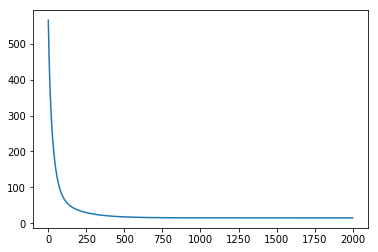

In [16]:
import matplotlib.pyplot as plt
plt.plot(l_custo)
plt.show()